**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# write your code here

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [15]:
import numpy as np

# Parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
w = 1.0
tau = 0.30
G_values = [1.0, 2.0]

# Effective wage after tax
tilde_w = (1 - tau) * w

# Define the optimal labor supply function
def optimal_labor_supply(alpha, kappa, nu, tilde_w):
    numerator = -kappa + np.sqrt(kappa**2 + 4 * (alpha / nu) * tilde_w**2)
    denominator = 2 * tilde_w
    return numerator / denominator

# Calculate the optimal labor supply for the given parameters
L_star = optimal_labor_supply(alpha, kappa, nu, tilde_w)

# Output the result
print(f"The optimal labor supply L*({tilde_w}) is {L_star:.4f}")

# Verification for different G values (though G does not affect the optimal labor supply in this case)
for G in G_values:
    print(f"For G = {G}, the optimal labor supply L*({tilde_w}) is {L_star:.4f}")

The optimal labor supply L*(0.7) is 15.3017
For G = 1.0, the optimal labor supply L*(0.7) is 15.3017
For G = 2.0, the optimal labor supply L*(0.7) is 15.3017


**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

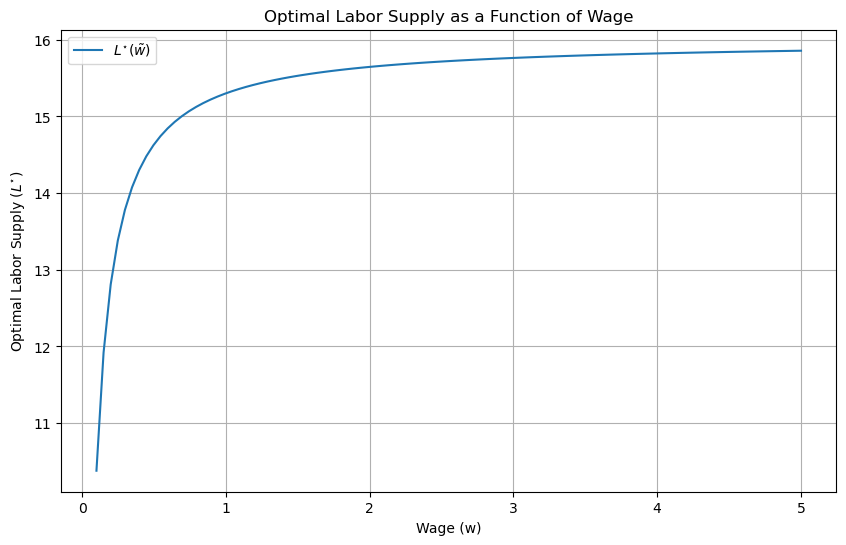

In [22]:
import numpy as np
import matplotlib.pyplot as plt
w_values = np.linspace(0.1, 5.0, 100)  # Avoid w=0 to prevent division by zero

def optimal_labor_supply(alpha, kappa, nu, tilde_w):
    numerator = -kappa + np.sqrt(kappa**2 + 4 * (alpha / nu) * tilde_w**2)
    denominator = 2 * tilde_w
    return numerator / denominator

L_star_values = []

for w in w_values:
    tilde_w = (1 - tau) * w
    L_star = optimal_labor_supply(alpha, kappa, nu, tilde_w)
    L_star_values.append(L_star)

plt.figure(figsize=(10, 6))
plt.plot(w_values, L_star_values, label=r'$L^{\star}(\tilde{w})$')
plt.xlabel('Wage (w)')
plt.ylabel('Optimal Labor Supply ($L^{\star}$)')
plt.title('Optimal Labor Supply as a Function of Wage')
plt.legend()
plt.grid(True)
plt.show()

# Parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
tau = 0.30


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


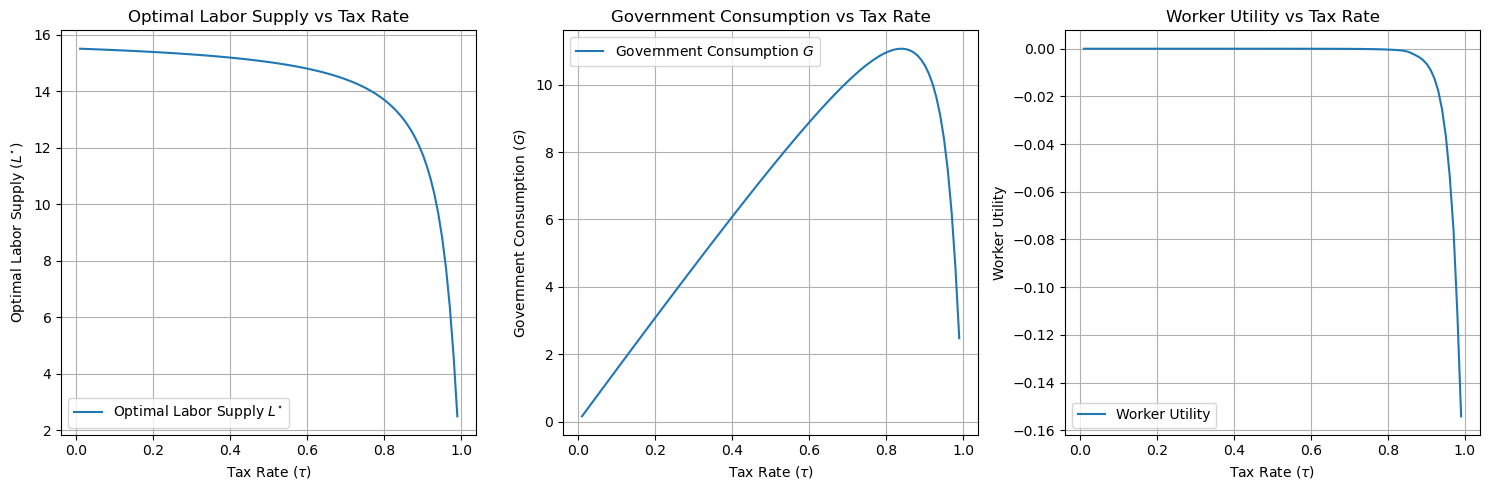

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
w = 1.0
rho = 8.0
beta = 0.90
gamma = 1.2
ybar = 1.5
r = 0.04
p = 0.5
Delta = 0.4

# Define the optimal labor supply function
def optimal_labor_supply(alpha, kappa, nu, tilde_w):
    numerator = -kappa + np.sqrt(kappa**2 + 4 * (alpha / nu) * tilde_w**2)
    denominator = 2 * tilde_w
    return numerator / denominator

# Utility function
def utility(c, rho):
    return (c**(1 - rho)) / (1 - rho)

# Second period utility
def v2(m2, rho, nu, kappa):
    def objective(c2):
        a2 = m2 - c2
        return - (utility(c2, rho) + nu * utility(a2 + kappa, rho))
    
    res = minimize_scalar(objective, bounds=(0, m2), method='bounded')
    return -res.fun

# Expected second period utility
def expected_v2(a1, s, rho, nu, kappa, beta, gamma, ybar, r, p, Delta):
    m2_p = (1 + r) * a1 + ybar + gamma * s + Delta
    m2_n = (1 + r) * a1 + ybar + gamma * s - Delta
    return beta * (p * v2(m2_p, rho, nu, kappa) + (1 - p) * v2(m2_n, rho, nu, kappa))

# First period utility and optimization
def worker_utility(m1, rho, nu, kappa, beta, tau, gamma, ybar, r, p, Delta):
    def objective(c1, s):
        a1 = m1 - c1 - tau * s
        if a1 < 0:
            return np.inf  # Penalize infeasible solutions
        return - (utility(c1, rho) + expected_v2(a1, s, rho, nu, kappa, beta, gamma, ybar, r, p, Delta))
    
    # Optimize for s = 0
    res_s0 = minimize_scalar(objective, args=(0,), bounds=(0, m1), method='bounded')
    v1_s0 = -res_s0.fun
    
    # Optimize for s = 1
    if m1 >= tau:  # Ensure feasibility of paying the cost of studying
        res_s1 = minimize_scalar(objective, args=(1,), bounds=(0, m1 - tau), method='bounded')
        v1_s1 = -res_s1.fun
    else:
        v1_s1 = -np.inf  # Not feasible to study
    
    # Determine optimal choice
    if v1_s1 > v1_s0:
        return v1_s1, 1  # Study
    else:
        return v1_s0, 0  # Do not study

# Define the range of tau values
tau_values = np.linspace(0.01, 0.99, 100)  # Avoid tau=0 and tau=1 to prevent division by zero and infinite values

# Initialize lists to store results
L_star_values = []
G_values = []
worker_utility_values = []

for tau in tau_values:
    tilde_w = (1 - tau) * w
    L_star = optimal_labor_supply(alpha, kappa, nu, tilde_w)
    G = tau * w * L_star
    m1 = kappa + (1 - tau) * w * L_star
    utility_value, _ = worker_utility(m1, rho, nu, kappa, beta, tau, gamma, ybar, r, p, Delta)
    
    L_star_values.append(L_star)
    G_values.append(G)
    worker_utility_values.append(utility_value)

# Plot the results
plt.figure(figsize=(15, 5))

# Plot L_star vs tau
plt.subplot(1, 3, 1)
plt.plot(tau_values, L_star_values, label='Optimal Labor Supply $L^{\star}$')
plt.xlabel('Tax Rate ($\\tau$)')
plt.ylabel('Optimal Labor Supply ($L^{\star}$)')
plt.title('Optimal Labor Supply vs Tax Rate')
plt.legend()
plt.grid(True)

# Plot G vs tau
plt.subplot(1, 3, 2)
plt.plot(tau_values, G_values, label='Government Consumption $G$')
plt.xlabel('Tax Rate ($\\tau$)')
plt.ylabel('Government Consumption ($G$)')
plt.title('Government Consumption vs Tax Rate')
plt.legend()
plt.grid(True)

# Plot worker utility vs tau
plt.subplot(1, 3, 3)
plt.plot(tau_values, worker_utility_values, label='Worker Utility')
plt.xlabel('Tax Rate ($\\tau$)')
plt.ylabel('Worker Utility')
plt.title('Worker Utility vs Tax Rate')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

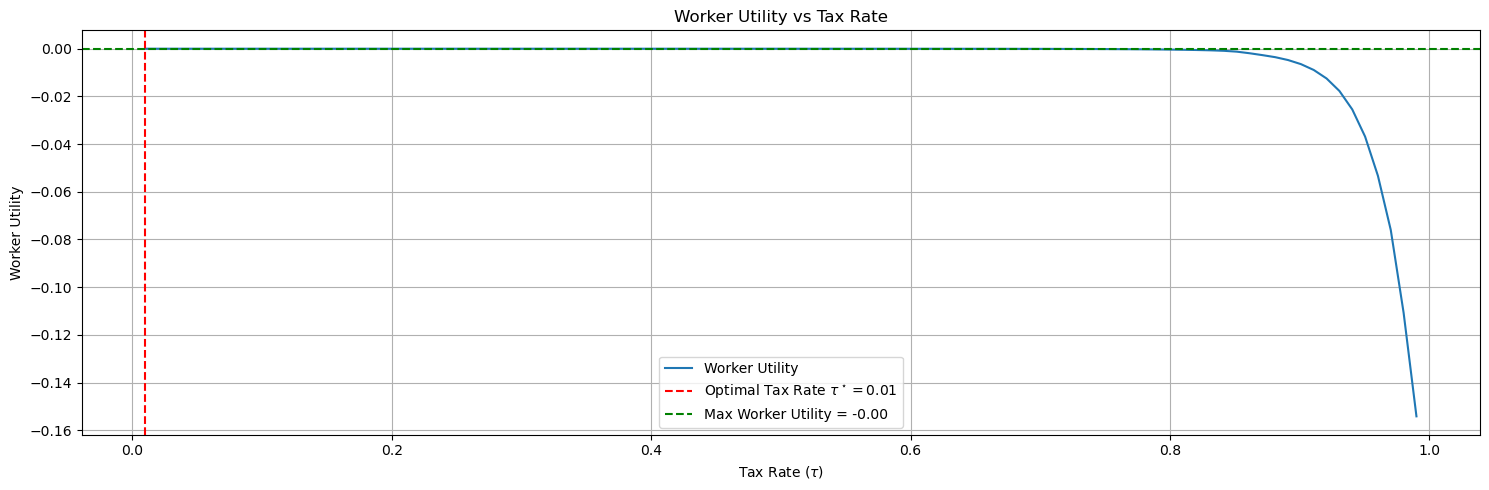

The socially optimal tax rate is tau_star = 0.0100, which maximizes worker utility to -0.0000


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
w = 1.0
rho = 8.0
beta = 0.90
gamma = 1.2
ybar = 1.5
r = 0.04
p = 0.5
Delta = 0.4

# Define the optimal labor supply function
def optimal_labor_supply(alpha, kappa, nu, tilde_w):
    numerator = -kappa + np.sqrt(kappa**2 + 4 * (alpha / nu) * tilde_w**2)
    denominator = 2 * tilde_w
    return numerator / denominator

# Utility function
def utility(c, rho):
    return (c**(1 - rho)) / (1 - rho)

# Second period utility
def v2(m2, rho, nu, kappa):
    def objective(c2):
        a2 = m2 - c2
        return - (utility(c2, rho) + nu * utility(a2 + kappa, rho))
    
    res = minimize_scalar(objective, bounds=(0, m2), method='bounded')
    return -res.fun

# Expected second period utility
def expected_v2(a1, s, rho, nu, kappa, beta, gamma, ybar, r, p, Delta):
    m2_p = (1 + r) * a1 + ybar + gamma * s + Delta
    m2_n = (1 + r) * a1 + ybar + gamma * s - Delta
    return beta * (p * v2(m2_p, rho, nu, kappa) + (1 - p) * v2(m2_n, rho, nu, kappa))

# First period utility and optimization
def worker_utility(m1, rho, nu, kappa, beta, tau, gamma, ybar, r, p, Delta):
    def objective(c1, s):
        a1 = m1 - c1 - tau * s
        if a1 < 0:
            return np.inf  # Penalize infeasible solutions
        return - (utility(c1, rho) + expected_v2(a1, s, rho, nu, kappa, beta, gamma, ybar, r, p, Delta))
    
    # Optimize for s = 0
    res_s0 = minimize_scalar(objective, args=(0,), bounds=(0, m1), method='bounded')
    v1_s0 = -res_s0.fun
    
    # Optimize for s = 1
    if m1 >= tau:  # Ensure feasibility of paying the cost of studying
        res_s1 = minimize_scalar(objective, args=(1,), bounds=(0, m1 - tau), method='bounded')
        v1_s1 = -res_s1.fun
    else:
        v1_s1 = -np.inf  # Not feasible to study
    
    # Determine optimal choice
    if v1_s1 > v1_s0:
        return v1_s1, 1  # Study
    else:
        return v1_s0, 0  # Do not study

# Define the range of tau values
tau_values = np.linspace(0.01, 0.99, 100)  # Avoid tau=0 and tau=1 to prevent division by zero and infinite values

# Initialize lists to store results
L_star_values = []
G_values = []
worker_utility_values = []

for tau in tau_values:
    tilde_w = (1 - tau) * w
    L_star = optimal_labor_supply(alpha, kappa, nu, tilde_w)
    G = tau * w * L_star
    m1 = kappa + (1 - tau) * w * L_star
    utility_value, _ = worker_utility(m1, rho, nu, kappa, beta, tau, gamma, ybar, r, p, Delta)
    
    L_star_values.append(L_star)
    G_values.append(G)
    worker_utility_values.append(utility_value)

# Find the socially optimal tax rate tau_star
tau_star_index = np.argmax(worker_utility_values)
tau_star = tau_values[tau_star_index]
max_worker_utility = worker_utility_values[tau_star_index]

# Plot the results
plt.figure(figsize=(15, 5))

# Plot worker utility vs tau
plt.plot(tau_values, worker_utility_values, label='Worker Utility')
plt.axvline(x=tau_star, color='r', linestyle='--', label=f'Optimal Tax Rate $\\tau^\\star = {tau_star:.2f}$')
plt.axhline(y=max_worker_utility, color='g', linestyle='--', label=f'Max Worker Utility = {max_worker_utility:.2f}')
plt.xlabel('Tax Rate ($\\tau$)')
plt.ylabel('Worker Utility')
plt.title('Worker Utility vs Tax Rate')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f'The socially optimal tax rate is tau_star = {tau_star:.4f}, which maximizes worker utility to {max_worker_utility:.4f}')


A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [6]:
# write your code here

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [7]:
# write your code here

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [8]:
# write your code here

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [9]:
# write your code here 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [10]:
# write your code here

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [11]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [12]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [13]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [14]:
# write your code here

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [15]:
# write your code here